# Experiments recreating “Schotter” by Georg Nees

In support of a [blog post](https://zellyn.com/2024/06/schotter-1/).

In [1]:
import math
import random
import drawsvg as draw

### Set up a drawing and group (for styling) to add paths to.

We set the style and attributes to match the [photograph](https://collections.vam.ac.uk/item/O221321/schotter-print-nees-georg/) from the Victoria and Albert museum as closely as possible.


In [2]:
d = draw.Drawing(180, 280, origin='center', style="background-color:#eae6e2")
g = draw.Group(stroke='#41403a', stroke_width='0.4', fill='none', stroke_linecap="round", stroke_linejoin="round")
p = None

## Helper methods

By implementing helper methods, we get to keep the main code as similar as possible.

* the random generators (`J1` and `J2`) were converted to functions
* the `x` and `y` parameters were reversed to mimic the typical orientation

In [3]:
# “empty” means “leer” in German. This is `MoveTo`
def LEER(x,y):
    global p
    if p is not None:
        g.append(p)
    p = draw.Path()
    p.M(y,x)

def LINE(x,y):
    p.L(y,x)

def CLOSE():
    if p is not None:
        g.append(p)
        d.append(g)

JE1 = JA1 = JE2 = JA2 = 0
def J1():
    return random.uniform(JE1, JA1)
def J2():
    return random.uniform(JE2, JA2)

def SIN(x):
    return math.sin(x)
def COS(x):
    return math.cos(x)

## Converted code

The is pretty close to a direct transliteration into Python.
* Variable declarations are unnecessary
* loops are more concise

In [4]:
R = 5 * 1.4142
HALFPI = 3.14159 * 0.5
PI4T = HALFPI * 0.5
I = 0
P = Q = PSI = 0.0

def QUAD():
  global I, JE1, JA1, JE2, JA2

  JE1 = 5*I/264
  JA1 = -JE1
  JE2 = PI4T * (1+I/264)
  JA2 = PI4T * (1-I/264)
  P1 = P+5+J1()
  Q1 = Q+5+J1()
  PSI = J2()

  LEER(P1+R*COS(PSI), Q1+R*SIN(PSI))
  for S in (1,2,3,4):
    PSI = PSI+HALFPI
    LINE (P1+R*COS(PSI), Q1+R*SIN(PSI))
  I += 1

def SERIE(QUER, HOCH, XMAL, YMAL, FIGUR):
  global P, Q

  P = -QUER * XMAL * 0.5
  Q = YANF = -HOCH * YMAL * 0.5

  for COUNTX in range(1, XMAL+1):
    Q = YANF
    for COUNTY in range(1, YMAL+1):
      FIGUR()
      Q = Q + HOCH
    P = P + QUER
  LEER(-148.0, -105.0)
  CLOSE()

SERIE(10.0, 10.0, 22, 12, QUAD)
# /SCHOTTER

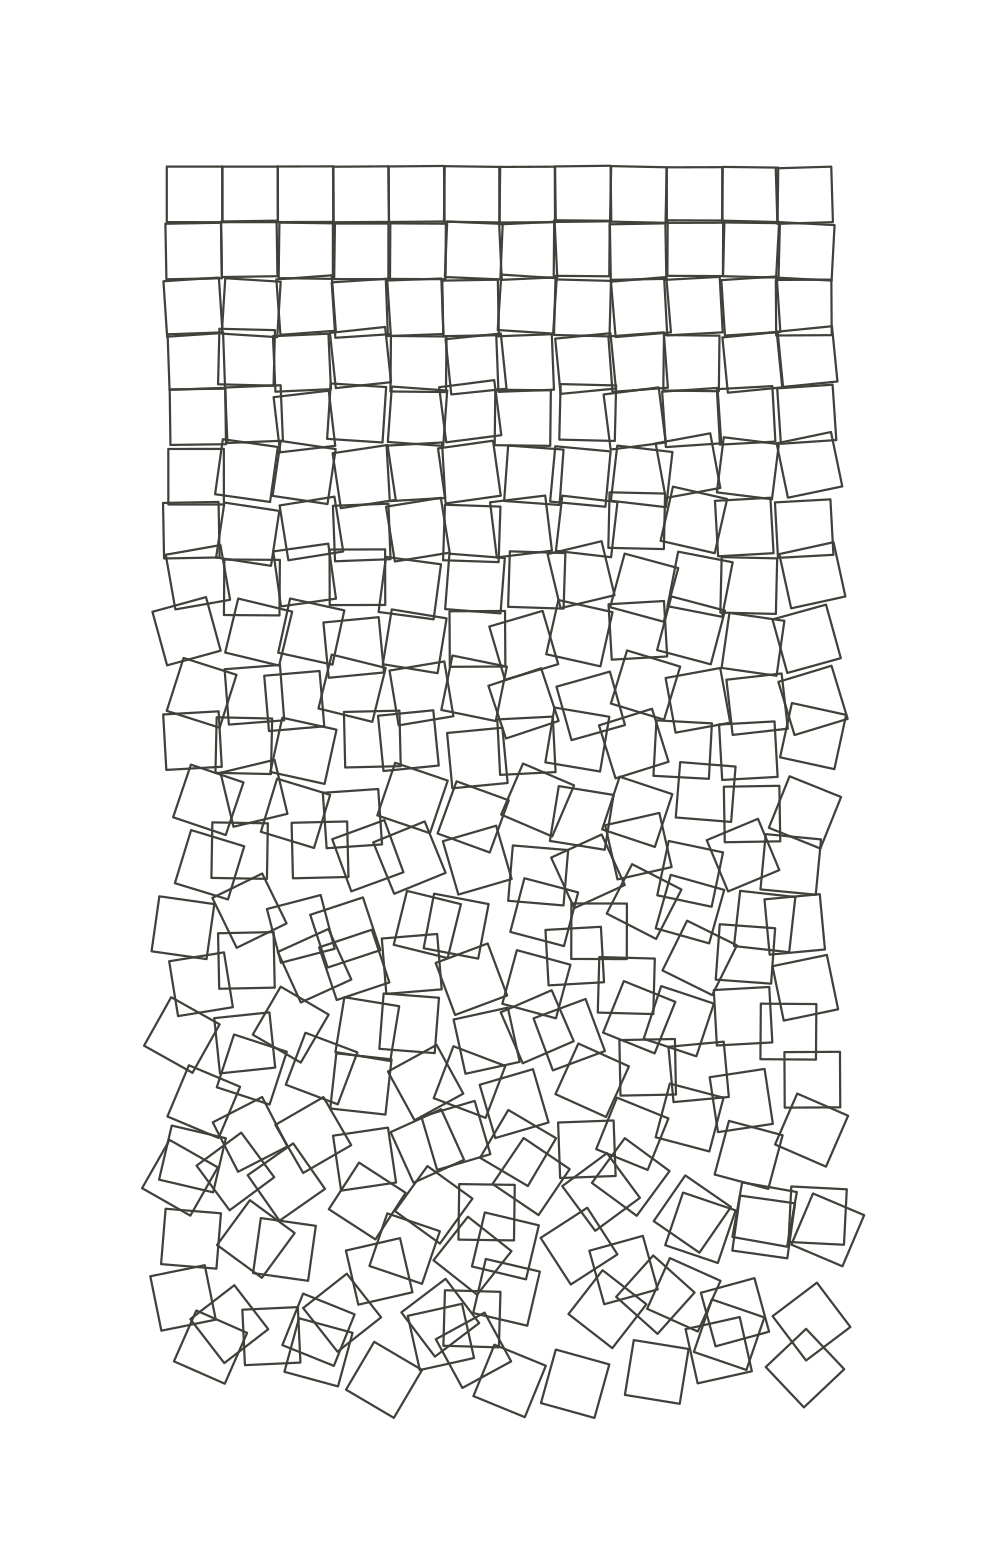

In [5]:
d.set_render_size(w=1000)

## Idiomatic Python version

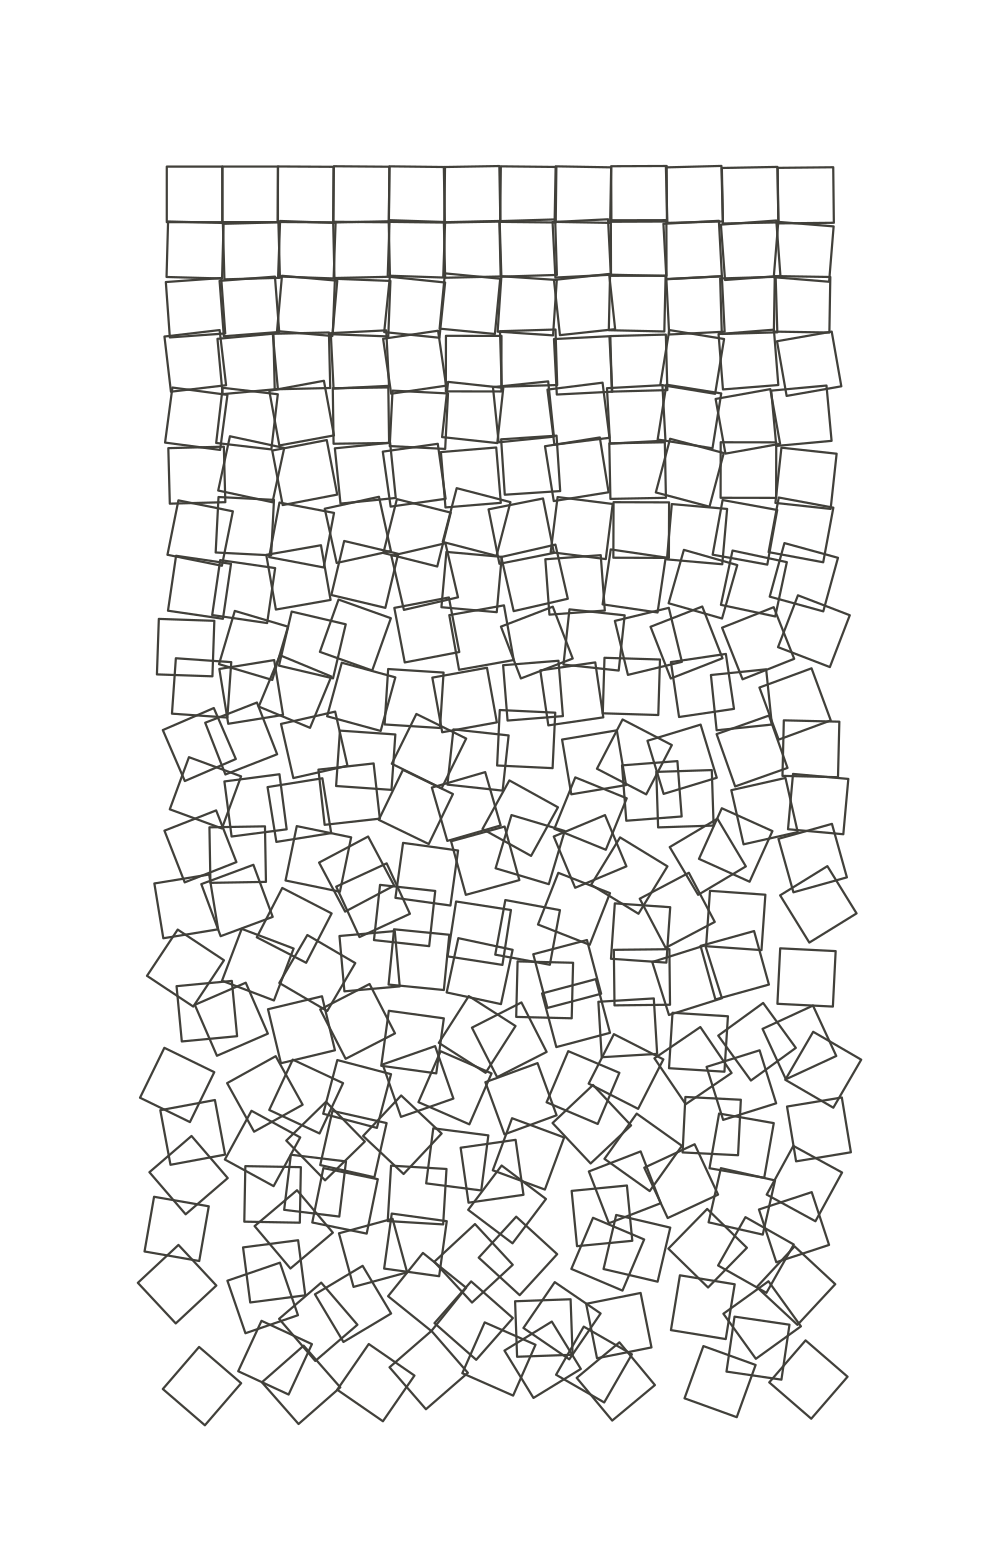

In [22]:
def draw_square(g, x, y, i):
    r = 5 * math.sqrt(2)
    move_limit = 5 * i / 264
    twist_limit = i / 264

    x_center = x + 5 + random.uniform(-move_limit, move_limit)
    y_center = y + 5 + random.uniform(-move_limit, move_limit)
    angle = math.pi/4 + random.uniform(-twist_limit, twist_limit)

    p = draw.Path()
    p.M(x_center + r * math.cos(angle), y_center + r * math.sin(angle))
    for step in range(4):
        angle += math.pi / 2
        p.L(x_center + r * math.cos(angle), y_center + r * math.sin(angle))
    g.append(p)

def draw_plot(x_size, y_size, x_count, y_count):
    d = draw.Drawing(180, 280, origin='center', style="background-color:#eae6e2")
    g = draw.Group(stroke='#41403a', stroke_width='0.4', fill='none',
                   stroke_linecap="round", stroke_linejoin="round")

    y = -y_size * y_count * 0.5
    x0 = -x_size * x_count * 0.5
    i = 0

    for _ in range(y_count):
        x = x0
        for _ in range(x_count):
            draw_square(g, x, y, i)
            x += x_size
            i += 1
        y += y_size
    d.append(g)
    return d

d = draw_plot(10.0, 10.0, 12, 22)
d.set_render_size(w=1000)